<a href="https://colab.research.google.com/github/bd-hedstrom/VideoGameSales/blob/main/Project2_VideoGameSales_Hedstrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choice 1: Japanese Whiskey Reviews


**1) Source of data**

 https://www.kaggle.com/koki25ando/japanese-whisky-review

**2) Brief description of the data**

A collection of reviews of 4 top selling japanese whiskey brands.

**3) What is the target?**

My target is to find a way to predict the probability someone will like a whiskey based on the age.

**4) Is this a classification or regression problem?**

I believe this would require a classification oriented approach as I would be evaluating whether the rating is good, bad or somewhere in the middle

**5) How many features?**

5

**6) How many rows of data?**

1130

**7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?**

The reviews themselves might be a bit of a nightmare. Inconsistent/Incorrect spelling, unclear opinions..Might be a difficult task. However, I think being strategic and filtering for specific buzzwords to gather some insightful data would be fun!

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [ ]:
#filename = '/content/japanese_whisky_review.csv'
#raw_whiskey_data = pd.read_csv(filename)
#raw_whiskey_data.head()

In [ ]:
#raw_whiskey_data.shape

## Choice 2: Video Game Sales

**1) Source of data**

https://www.kaggle.com/gregorut/videogamesales

**2) Brief description of data**

A compilation of reviews of various video games

**2) Brief description of the data**

 List of video game sales consisting of titles which sold more than 100,000 copies

**3) What is the target?**

I would like to build a model to find the best year to release a game and on which platform

**4) Is this a classification or regression problem?**

I believe this would be a regression problem

**5) How many features?**

11

**6) How many rows of data?**

16598

**7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?**

I think finding the most appropriate scope would be the most challenging as there is a massive amount of data to narrow down to tell a proper story with the data. The data itself seems very consistent but I think making sure there aren't any hidden spaces or checking for data types will also be a concern.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd

filename = '/content/videoGameSales.csv'
raw_VG_data = pd.read_csv(filename)
raw_VG_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
raw_VG_data.shape

(16598, 11)

#Part 2:  Proceeding with Video Game Sales Data

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made 

In [ ]:
#Started with .info, then .isnull().sum() to get a scope of the data. Noticed there are missing values in Year and Publisher columns.
raw_VG_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
raw_VG_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
raw_VG_data['Year'].fillna(2006 , inplace = True)
raw_VG_data['Publisher'].fillna('No Publisher' , inplace = True)


In [ ]:
#Removed Rank column as it is not a feature that has to do with sales in this situation
raw_VG_data.drop(columns = 'Rank', inplace = True)

In [ ]:
#Dropped Duplicates
raw_VG_data.drop_duplicates()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
#Did a general search for inconsistent categorical values. Did not find any inconsistencies!
raw_VG_data.value_counts(['Name'])

Name                                       
Need for Speed: Most Wanted                    12
FIFA 14                                         9
Madden NFL 07                                   9
LEGO Marvel Super Heroes                        9
Ratatouille                                     9
                                               ..
PenPen TriIceLon                                1
Pen 1 Grand Prix: Penguin no Mondai Special     1
Peggle: Dual Shot                               1
Peggle Nights                                   1
'98 Koshien                                     1
Length: 11493, dtype: int64

In [ ]:
raw_VG_data.value_counts(['Platform'])

Platform
DS          2163
PS2         2161
PS3         1329
Wii         1325
X360        1265
PSP         1213
PS          1196
PC           960
XB           824
GBA          822
GC           556
3DS          509
PSV          413
PS4          336
N64          319
SNES         239
XOne         213
SAT          173
WiiU         143
2600         133
NES           98
GB            98
DC            52
GEN           27
NG            12
SCD            6
WS             6
3DO            3
TG16           2
PCFX           1
GG             1
dtype: int64

In [ ]:
raw_VG_data.value_counts(['Genre'])

Genre       
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
dtype: int64

In [ ]:
raw_VG_data.value_counts(['Publisher'])

Publisher                   
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
EON Digital Entertainment          1
EA Games                           1
DreamWorks Interactive             1
Rain Games                         1
Quelle                             1
Length: 579, dtype: int64

In [ ]:
# Used .describe to get a sense of data distribution (min/max in particular)to note any outliers. 
raw_VG_data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.399807,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.781426,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


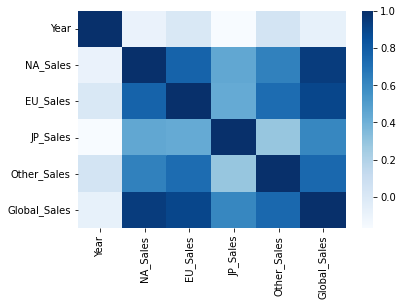

In [ ]:
#Created a heatmap of the data. Notice that Japan's sales remained the most consistent of all.

correlation = raw_VG_data.corr()
sns.heatmap(correlation , cmap = 'Blues');

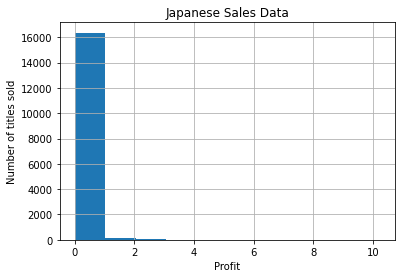

In [ ]:
# Utilized a histogram to get a visuatlization of data distribution for this particular column as this will be the main focus of the project
raw_VG_data['JP_Sales'].hist();
plt.title('Japanese Sales Data')
plt.xlabel('Profit')
plt.ylabel('Number of titles sold');

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
JapanSales = raw_VG_data[['Year','JP_Sales']]

In [ ]:
scaled_df = scaler.fit_transform(JapanSales)

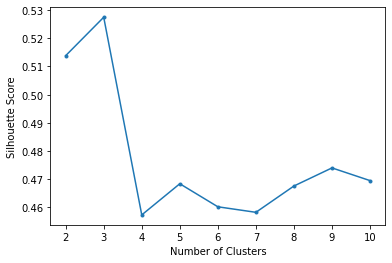

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

#Kmeans = 3
#0.509368464437955

#kmeans = 4
#0.5297510706231806

0.5297510706231806

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

#hc = 3
#0.5677351532131727

#hc = 2
#0.5833374787995859

0.5833374787995859

In [ ]:
dbs = DBSCAN(eps = 0.5, min_samples = 2).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

#dbs = 3
#0.787588189345394

#dbs = 2
#0.7885451346664195

0.7885451346664195

The highest performing model is DBS with oddly enough the silouette score of .78 with a minimum of 2 clusters as opposed to 3. I was predicting that 3 would be the correct number given the graph above. Regardless, I would use DBS as the production model.

Edit: This is an unsupervised learning model, and the goal of this project is to predit how well a video game will sell in Japan based on the year.